## Problem 1

We denote the states susceptible as state $1$ and infected as state $2$

### c)
Write code to simulate the continuous-time Markov chain over a time period of 1000 years

### c1)
plot one realization of X(·) over 5 years, i.e., for 0 ≤ t ≤ 5 · 365

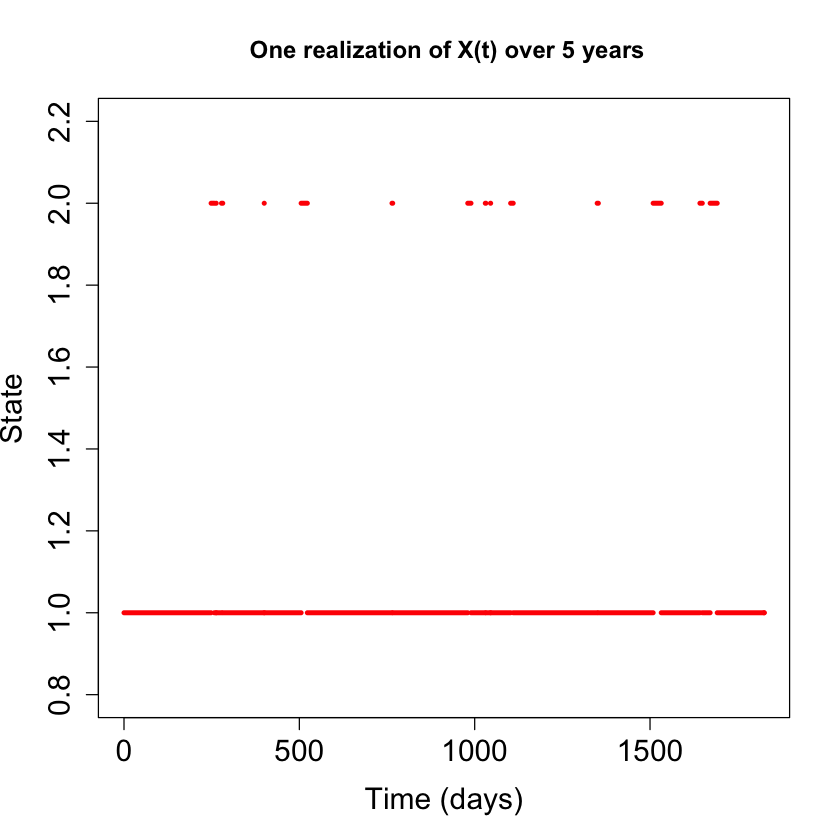

In [214]:
# Set seed
set.seed(5*365)

# Switching between state 0 and 1
  states = c(1) #list of states during time periode, for now contains starting state
  times = c(0) # list of time in each new state, for now constains time in starting state
  
t_end=5*365

  # Rates
  rates=c(1/100,1/7)#rates, first the rate from S to I and then rate from I to S
  i=1 #number of states during the given time period
    
  while( tail(times, n=1) < t_end){ # loop until final time t_end
    current = states[i]  # the current state
    t_sojourn = rexp(1, rate = rates[current]) #sojourn time in the current state is exponential distributed
    new_state = (current)%%2 + 1  # with this operation if the current state is 1 the new state will be 2 and vice versa.
    states = c(states, new_state) # we add the new state to the list 
    times = c(times, tail(times,1)+t_sojourn) # add the current time by adding the sojourn time of the last state
    i=i+1 #next state
  }
  
  times[length(times)] = t_end #cut the last state to last untill t_end (not further)
  
# plot of one realization of the states, X over 5 years
  plot(NULL, 
       NULL, 
       xlim = c(0, t_end),
       ylim = c(0.8, 2.2),
       main=" One realization of X(t) over 5 years",
       xlab = "Time (days)", 
       ylab = "State",
       cex.lab = 1.5, 
       cex.axis = 1.5)

for(i in 1:(length(states)-1)){
    lines(times[i:(i+1)], rep(states[i], 2),lwd = 4, col= "red")
  }
  lines(tail(times, 1) + c(0,1), c(1,1), lwd = 4, col = "red")
  

  

### c2) 

Estimate the long-run mean fraction of time per year that an individual has a cold for one realization of 1000 years.
The first part of the code is similar to the code in c1)

In [215]:
# Set seed
set.seed(5*365)

# Switching between 0 and 1
  states = c(1) #list of states, for now contains starting state
  times = c(0) # list with time, for now starting time
  t_end=1000*365 #1000 years

   # Rates
  rates=c(1/100,1/7)#rates, first the rate from S to I and then rate from I to S
  i=1 #number of states during the given time period
    
  while( tail(times, n=1) < t_end){ # loop until final time t_end
    current = states[i]  # the current state
    t_sojourn = rexp(1, rate = rates[current]) #sojourn time in the current state is exponential distributed
    new_state = (current)%%2 + 1  # with this operation if the current state is 1 the new state will be 2 and vice versa.
    states = c(states, new_state) # we add the new state to the list 
    times = c(times, tail(times,1)+t_sojourn) # add the current time by adding the sojourn time of the last state
    i=i+1 #next state
  }
  
  times[length(times)] = t_end #cut the last state to last untill t_end (not further)


total_time= c(0,0) # list of total time spent in each state
  for(i in 1:(length(states)-1)){ # go through the list of states 
    total_time[states[i]] = total_time[states[i]]+times[i+1]-times[i] # adds the time spent in state x[i]
  }
  
  frac<-total_time/t_end #find the fraction of time in state 1 and 2
  x = frac[2]*365 #amounts of days in state 2
  print(paste0("Long-run mean fraction of time per year in state 2: ", x ))


[1] "Long-run mean fraction of time per year in state 2: 24.120742946358"


## Problem 2

### a)

We will construct the mean vector and the covariance matrix required to compute the conditional means and covariances of the process at the 51 points (constructed by a regular grid) conditional on the five evaluation
points (observed).

We denote the five points as distribution $b$, and the 51 points as the distribution $a$.

$$\overrightarrow{x} = (\overrightarrow{x_a}, \overrightarrow{x_b}) \sim N_{n_a + n_b} 
\Bigg( \begin{bmatrix}
       \overrightarrow{\mu_a}             \\[0.3em]
       \overrightarrow{\mu_b}              \\[0.3em]
     \end{bmatrix},
  \left[ {\begin{array}{cc}
   \Sigma_{aa} & \Sigma_{ab} \\
   \Sigma_{ba} & \Sigma_{bb} \\
  \end{array} } \right]
 \Bigg)$$
 
The conditional distribution is denoted as $c$:

$$X_a \mid X_b = X_c \sim N_{n_a}(\overrightarrow{\mu_c}, \Sigma_c)$$

$$\overrightarrow{\mu_c} = \overrightarrow{\mu_a} + \Sigma_{ab} \Sigma_{bb}^{-1} (\overrightarrow{X_b} - \overrightarrow{\mu_b} )
$$

$$ \Sigma_c = \Sigma_{aa}- \Sigma_{ab}\Sigma_{bb}^{-1}\Sigma_{ba} $$

In [216]:
#set seed
set.seed(12345)

#define the mean and variance for all the values
mean = 0.5
var = 0.5^2

#define the mean vectors for a and b
mu_a<-rep(mean,51) 
mu_b<-rep(mean,5)

#define the x-values (theta) for a and b.
teta_a<-seq(0.25,0.5,by=0.005) #a grid with spacing 0.005 from 0.25 to 0.5
teta_b<-c(0.3,0.35,0.39,0.41,0.45) #observed points

#the correlation function between two values a and b for theta, defined in the problem text.
corr<-function(a,b){
  (1+15*abs(a-b))*exp(-15*abs(a-b))
}

We will now caluclate the covariance matrix for c.
We know that the covariance between two random variables is defned as:

$$ Cov(X,Y) = Corr(X,Y) \sqrt{Var(X) Var(Y)} $$

First calculate the quadratic matrices $\Sigma_{aa}$ and $\Sigma_{bb}$:

In [217]:
cov_matrix<-function(var,teta){
  l<-length(teta) #number of x-values denotes matrix dimensions 
  sigma<-diag(var,l) #fill in the diagonal with 1
    #fill in the upper triangular matrix and copy to the lower triangular part
  for (i in 1:(l-1)){ #row-wise
    for (j in (i+1):l){#column-wise
      c=corr(teta[i],teta[j]) #calculate correlation between thetas
      sigma[i,j]=c*var #calculate covariance from the formula above
      sigma[j,i]=c*var #symmetric values
    }}
    return(sigma)
  }

#the two quadratic matrices
sigma_b<-cov_matrix(var,teta_b)
sigma_a<-cov_matrix(var,teta_a)


We will now find $\Sigma_{ab}$ and $\Sigma_{ba}$. 
Remark that $\Sigma_{ab} = \Sigma_{ba}^T$

In [218]:
sigma_ab<-matrix(0,51,5) #make an empty 51x5 matrix
for (i in 1:51){ #rows
  for (j in 1:5){ #columns
    sigma_ab[i,j]=corr(teta_a[i],teta_b[j])*var #calculate covariance in each entry
  }}

Now it is time to calculate the mean vector and the covariance matrix for c.
We use the formulas for the conditional distribution c provided above. 

In [219]:
observed<-c(0.5,0.32,0.40,0.35,0.60) #the observed values, y(theta)

#mean vector for c
mu<-mu_a + sigma_ab%*%solve(sigma_b)%*%(observed-mu_b)

#covariance matrix
sigma<-sigma_a-sigma_ab%*%solve(sigma_b)%*%t(sigma_ab)


Display the prediction as a function of θ, along with 90% prediction intervals.
The prediction interval is calculated from the probability 
$$P(l < X < u) = 0.90$$
where $l= \mu_c -z\sigma_c$ and $ u = \mu_c + z \sigma_c $.

The prediction interval is then:
$$
\left[\mu_c -z\sigma_c ,\ \mu_c +z\sigma_c \right]
$$

In [220]:
sd<-sqrt(diag(sigma)) #standard error 
q<-qnorm(0.9)
v<-q*sd #the diagonal of Sigma contains the variance for each RV

lower<-mu-v #lower bound
upper<-mu+v #upper bound

We will now plot the mean vector $\mu_c$as a function of $\theta$.

Warning message in title(...):
“conversion failure on 'parameter value, thetas, θ' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in title(...):
“conversion failure on 'parameter value, thetas, θ' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in title(...):
“conversion failure on 'estimated values for the fit, Y(θ)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in title(...):
“conversion failure on 'estimated values for the fit, Y(θ)' in 'mbcsToSbcs': dot substituted for <b8>”

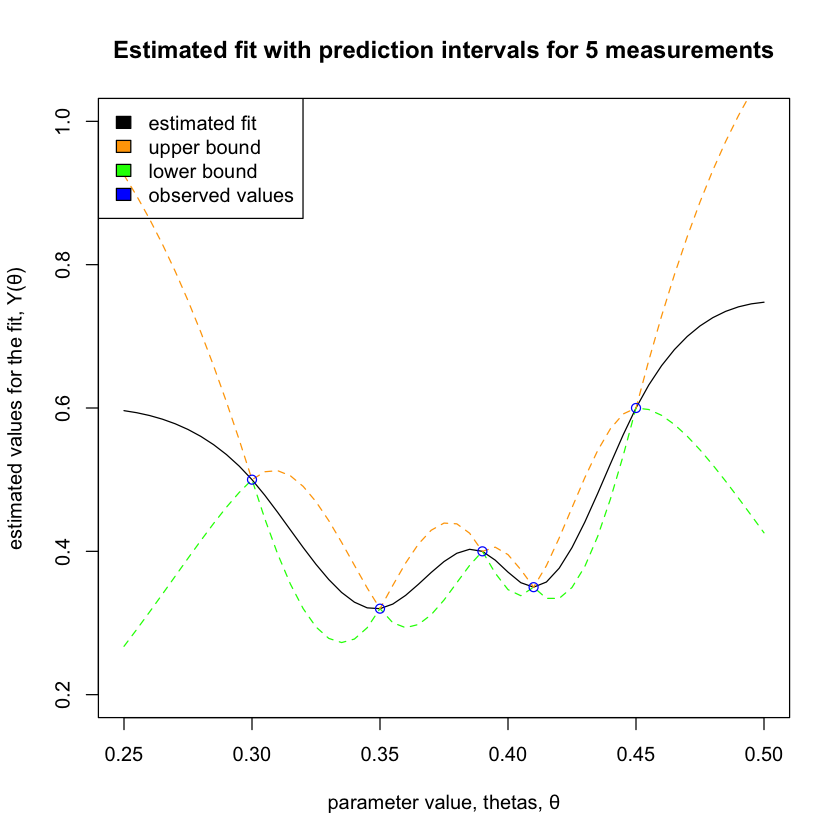

In [221]:
plot(teta_a, mu,
main="Estimated fit with prediction intervals for 5 measurements",
ylab="estimated values for the fit, Y(θ)",
xlab = "parameter value, thetas, θ",  
ylim = c(0.2,1),
type="l",
col="black")
lines(teta_a, lower, col="green", lty=2)
lines(teta_a, upper, col = "orange", lty=2)
points(teta_b, observed, col= "blue")
legend("topleft",
c("estimated fit", "upper bound", "lower bound", "observed values"),
fill=c("black","orange", "green", "blue")
)

### 2b)

Use the predictions from a) to compute the
conditional probability that $y(\theta) < 0.30$ given the 5 evalution points. Plot the probability as a
function of θ.

Warning message in title(...):
“conversion failure on 'parameter value, thetas, θ' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in title(...):
“conversion failure on 'parameter value, thetas, θ' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in title(...):
“conversion failure on 'probability, P(Y(θ)<0.30)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in title(...):
“conversion failure on 'probability, P(Y(θ)<0.30)' in 'mbcsToSbcs': dot substituted for <b8>”

[1] "the best theta in order to find the probability asked for is: 0.34"


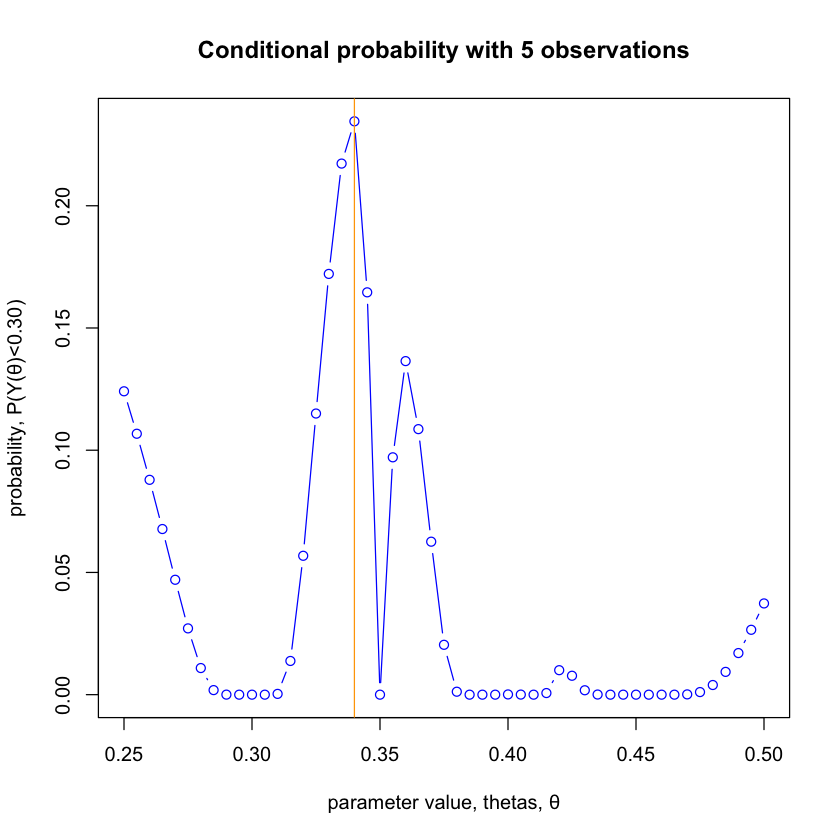

In [222]:
p<-pnorm(0.3, mean = mu, sd = sd)
plot(teta_a, p,
    main="Conditional probability with 5 observations",
    ylab="probability, P(Y(θ)<0.30)",
    xlab = "parameter value, thetas, θ",  
    type = "b",
     col = "blue"
    )

#find the theta that gives us the best chance to achieve y(theta)<0.3
teta_best = teta_a[which.max(p)]

print(paste0("the best theta in order to find the probability asked for is: ", teta_best))

abline(v = teta_best, col="orange")

### 2c)

We add a new mesaurement to the set of observed values, $(\theta, Y(\theta)$ = $(0.33, 0.40)$
Compute and visualize the prediction, the 90 % prediction interval, and the probabilities that $ Y(\theta) < 0.30$.

If we can add one more value for $\theta$, what will be the best chance to achieve $ Y(\theta) < 0.30$.

Warning message in title(...):
“conversion failure on 'parameter value, thetas, θ' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in title(...):
“conversion failure on 'parameter value, thetas, θ' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in title(...):
“conversion failure on 'estimated values for the fit, Y(θ)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in title(...):
“conversion failure on 'estimated values for the fit, Y(θ)' in 'mbcsToSbcs': dot substituted for <b8>”

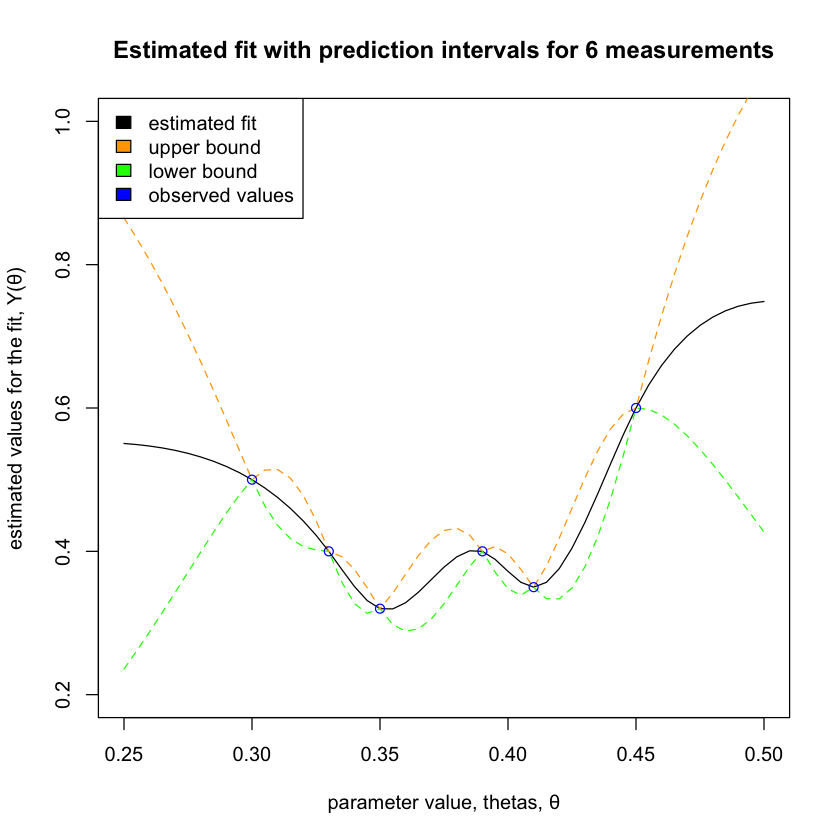

In [223]:
#add new value to mu_b and theta_b 
mu_b<-rep(mean,6)
teta_b<-c(0.3,0.35,0.39,0.41,0.45,0.33) #observed points

sigma_b<-cov_matrix(var,teta_b) #caluclate sigma_b

#calculate sigma_ab
sigma_ab<-matrix(0,51,6) #make an empty 51x5 matrix
for (i in 1:51){ #rows
  for (j in 1:6){ #columns
    sigma_ab[i,j]=corr(teta_a[i],teta_b[j])*var #calculate covariance in each entry
  }}

#new observed list
observed<-c(0.5,0.32,0.40,0.35,0.60,0.4) # y(theta)

#new mean vector for c
mu<-mu_a + sigma_ab%*%solve(sigma_b)%*%(observed-mu_b)

#new covariance matrix for c
sigma<-sigma_a-sigma_ab%*%solve(sigma_b)%*%t(sigma_ab)

#force too small values to zero
sigma[sigma < 1e-13] <-0

#new standrd error
sd<-sqrt(diag(sigma))
q<-qnorm(0.9) #find z for 0.9
v<-q*sd #the diagonal of Sigma contains the variance for each RV

lower<-mu-v #lower bound
upper<-mu+v #upper bound

#new plot
plot(teta_a, mu,
main="Estimated fit with prediction intervals for 6 measurements",
ylab="estimated values for the fit, Y(θ)",
xlab = "parameter value, thetas, θ",  
ylim = c(0.2,1),
type="l",
col="black")
lines(teta_a, lower, col="green", lty=2)
lines(teta_a, upper, col = "orange", lty=2)
points(teta_b, observed, col= "blue")
legend("topleft",
c("estimated fit", "upper bound", "lower bound", "observed values"),
fill=c("black","orange", "green", "blue")
)

Plot the probability in the problem as a function of theta

[1] "the best theta in order to find the probability asked for is: 0.36"


Warning message in title(...):
“conversion failure on 'parameter value, thetas, θ' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in title(...):
“conversion failure on 'parameter value, thetas, θ' in 'mbcsToSbcs': dot substituted for <b8>”Warning message in title(...):
“conversion failure on 'probability, P(Y(θ)<0.30)' in 'mbcsToSbcs': dot substituted for <ce>”Warning message in title(...):
“conversion failure on 'probability, P(Y(θ)<0.30)' in 'mbcsToSbcs': dot substituted for <b8>”

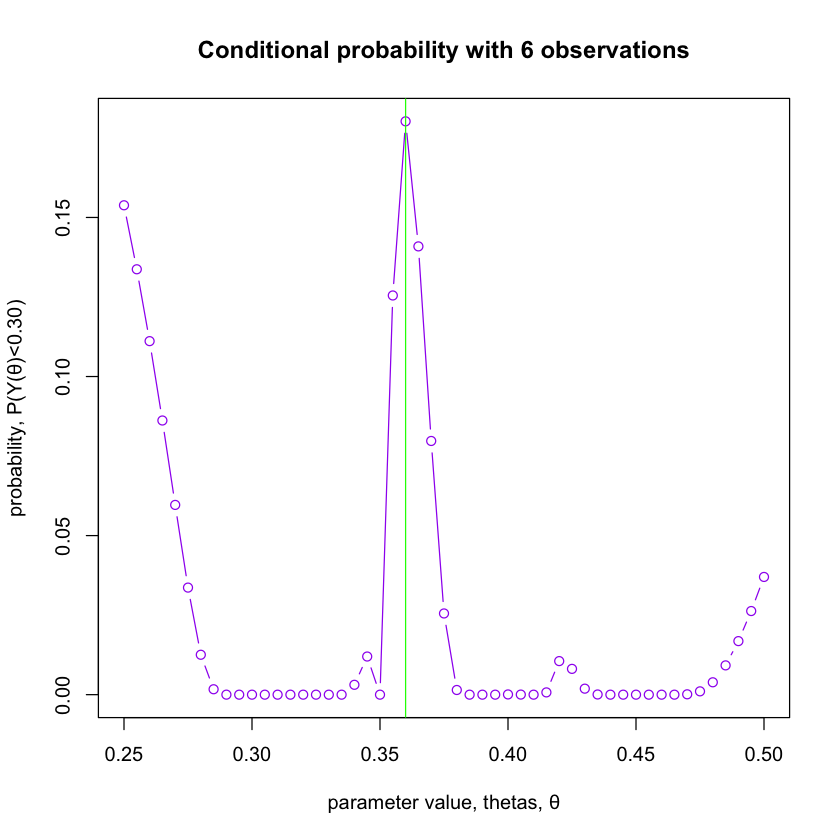

In [224]:
p<-pnorm(0.3, mean = mu, sd = sd)

#find the theta that gives us the best chance to achieve y(theta)<0.3
teta_best = teta_a[which.max(p)]
print(paste0("the best theta in order to find the probability asked for is: ", teta_best))

#plot
plot(teta_a, p,
    main="Conditional probability with 6 observations",
    ylab="probability, P(Y(θ)<0.30)",
    xlab = "parameter value, thetas, θ",  
    type = "b",
     col = "purple"
    )

abline(v = teta_best, col="green")